In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1 11 вычислить интеграл на отрезке от   4 до   8 от функции 
#      f(x)= (  -5*x -  2 )/( x*x +  5) 
#      1)по формуле пр.прямоугольников с шагами h1= 1.00 , h2= 0.50 и h3= 0.25
#        сделать уточнение по формуле Рунге
#      2)по формуле трапеций с шагами h1= 1.00 , h2= 0.50 и h3= 0.25
#        сделать уточнение по формуле Рунге
#      3)по формуле Симпсона с шагами h1= 1.00 и  h2= 0.50
#        сделать уточнение по формуле Рунге-Ромберга

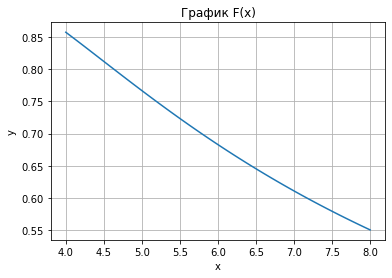

In [3]:
def F(x):
    return((5*x-2)/(x**2+5))
x = np.linspace(4, 8)
y=[F(i) for i in x]
#Отрисовка граффика
plt.title('График F(x)')
plt.xlabel('x')
plt.ylabel('y') 
plt.grid()
plt.plot(x, y)

In [4]:
#10.0.1 применение Формулы Рунге функция
def Runge(z1,z2,z3,h1,h2,h3,p):
    D1= np.array([
        [z1,h1**p,h1**(p+1)],
        [z2,h2**p,h2**(p+1)],
        [z3,h3**p,h3**(p+1)]
    ])
    D2=np.array([
        [1.0,h1**p,h1**(p+1)],
        [1.0,h2**p,h2**(p+1)],
        [1.0,h3**p,h3**(p+1)]
    ])
    print("Матрица D1=")
    print(D1)
    print("Матрица D2=")
    print(D2)
    D1=np.linalg.det(D1)
    D2=np.linalg.det(D2)
    print("детерминат D1=",D2)
    print("детерминат D2=",D2)
    z=D1/D2
    return(z)
#10.0.2 применение Формулы  Рунге–Ромберга функция
def Runge_for_2(z1,z2,h1,h2,p):
    return(z1+(z1-z2)/((h2/h1)**p-1))

In [5]:
#10.1 метод правых прямоугольников.

def S1(h):
    x= np.linspace(4,8,int(5.0/h))
    y= [F(i) for i in x ]
    s=0
    for i in range (len(x)-1):
        s+=y[i+1]*(x[i+1]-x[i])
    return(s)
        
for i in [1.0,0.5,0.25]:
    print("Интеграл по методу правых прямоугольников с шашом {t} равен {S}".format(t=i,S=S1(i)))

Интеграл по методу правых прямоугольников с шашом 1.0 равен 2.61142924472723
Интеграл по методу правых прямоугольников с шашом 0.5 равен 2.6942696594091657
Интеграл по методу правых прямоугольников с шашом 0.25 равен 2.729682012500784


In [6]:
S=Runge(S1(1.0),S1(0.5),S1(0.25),1.0,0.5,0.25,2)
print("применение Формулы Рунге к методу вычисления интеграла при помощи правых прямоугольников {S}".format(S=S))

Матрица D1=
[[2.61142924 1.         1.        ]
 [2.69426966 0.25       0.125     ]
 [2.72968201 0.0625     0.015625  ]]
Матрица D2=
[[1.       1.       1.      ]
 [1.       0.25     0.125   ]
 [1.       0.0625   0.015625]]
детерминат D1= -0.08203124999999999
детерминат D2= -0.08203124999999999
применение Формулы Рунге к методу вычисления интеграла при помощи правых прямоугольников 2.7442865586591587


In [7]:
#10.2 метод Формула трапеций
def S2(h):
    x= np.linspace(4,8,int(5.0/h))
    y= [F(i) for i in x ]
    s=0
    for i in range (len(x)-2):
        s+=2*y[i+1]
    s+=y[0]+y[-1]
    s=s*h/2
    return(s)
        
for i in [1.0,0.5,0.25]:
    print("Интеграл по формуле трапеции с шашом {t} равен {S}".format(t=i,S=S2(i)))

Интеграл по формуле трапеции с шашом 1.0 равен 2.7646383544580786
Интеграл по формуле трапеции с шашом 0.5 равен 3.1076579217007363
Интеграл по формуле трапеции с шашом 0.25 равен 3.2797996672773926


In [8]:
S=Runge(S2(1.0),S2(0.5),S2(0.25),1.0,0.5,0.25,2)
print("применение Формулы Рунге к методу вычисления интеграла по формуле трапеции даёт результат {S}".format(S=S))

Матрица D1=
[[2.76463835 1.         1.        ]
 [3.10765792 0.25       0.125     ]
 [3.27979967 0.0625     0.015625  ]]
Матрица D2=
[[1.       1.       1.      ]
 [1.       0.25     0.125   ]
 [1.       0.0625   0.015625]]
детерминат D1= -0.08203124999999999
детерминат D2= -0.08203124999999999
применение Формулы Рунге к методу вычисления интеграла по формуле трапеции даёт результат 3.3536348879488487


In [9]:
#10.3 метод Формула Симпсона
def S3(h):
    x= np.linspace(4,8,int(5.0/h))
    y= [F(i) for i in x ]
    s=0
    y1=y[1:-1:2]
    y2=y[2:-2:2]
    for i in y1:
        s+=4*i
    for i in y2:
        s+=2*i
    s+=y[0]+y[-1]
    s=s*h/3
    return(s)
        
for i in [1.0,0.5]:
    print("Интеграл по формуле Симпсона с шашом {t} равен {S}".format(t=i,S=S3(i)))

Интеграл по формуле Симпсона с шашом 1.0 равен 2.7616107548239044
Интеграл по формуле Симпсона с шашом 0.5 равен 2.8211122212160755


In [10]:
S=Runge_for_2(S2(1.0),S2(0.5),1.0,0.5,4)
print("применение Формулы Рунге–Ромберга к методу вычисления интеграла по формуле трапеции даёт результат {S}".format(S=S))

применение Формулы Рунге–Ромберга к методу вычисления интеграла по формуле трапеции даёт результат 3.1305258928502466
